In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

In [3]:
df_preprocessed = pd.read_csv('../data/preprocessed_sleep.csv')
df = pd.read_csv('../data/processed_sleep_fft.csv')
con_ftrs = ['alpha', 'theta', 'slowwave', 'sigma']
cat_ftrs = ['channel_name', 'subject', 'NAP']
label = ['label']
df_preprocessed.shape


(45441, 45)

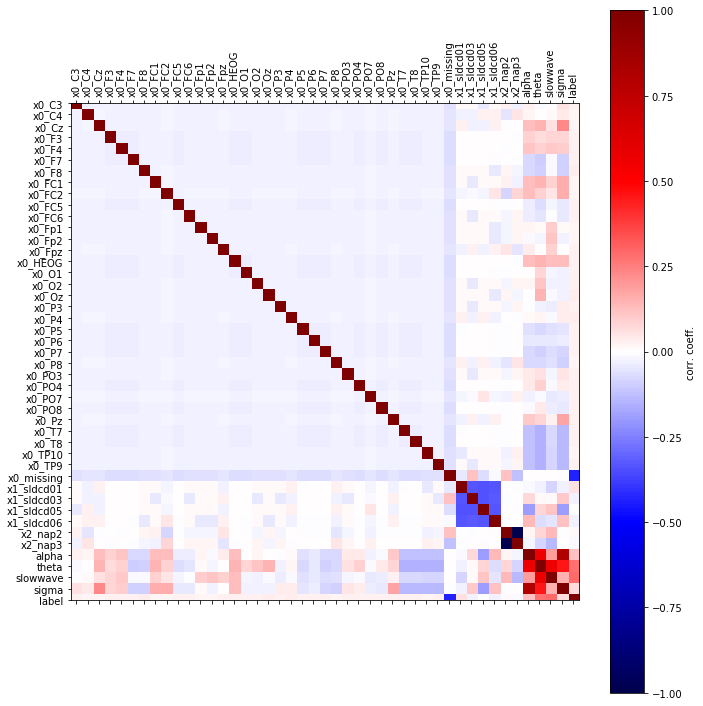

In [72]:
corr_matrix = df_preprocessed.corr()
#print(df_preprocessed.columns)
plt.figure(figsize=(10,10))
plt.matshow(corr_matrix,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df_preprocessed.corr().shape[0]),list(df_preprocessed.corr().columns),rotation=90)
plt.yticks(np.arange(df_preprocessed.corr().shape[0]),list(df_preprocessed.corr().columns))
plt.tight_layout()
plt.savefig('../figures/corr_coeff_dummies.png',dpi=300)
plt.show()

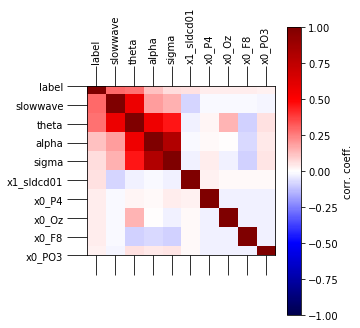

In [7]:
corrmat = df_preprocessed.corr()
#print(df_preprocessed.columns)
all_cols = corrmat.sort_values('label',ascending=False)['label'].index 
cols = all_cols[:10] # positively correlated features

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(5,5))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tick_params(size = 20)
plt.tight_layout()
plt.savefig('../figures/corr_coeff_dummies_poscorr.png',dpi=300)
plt.show()

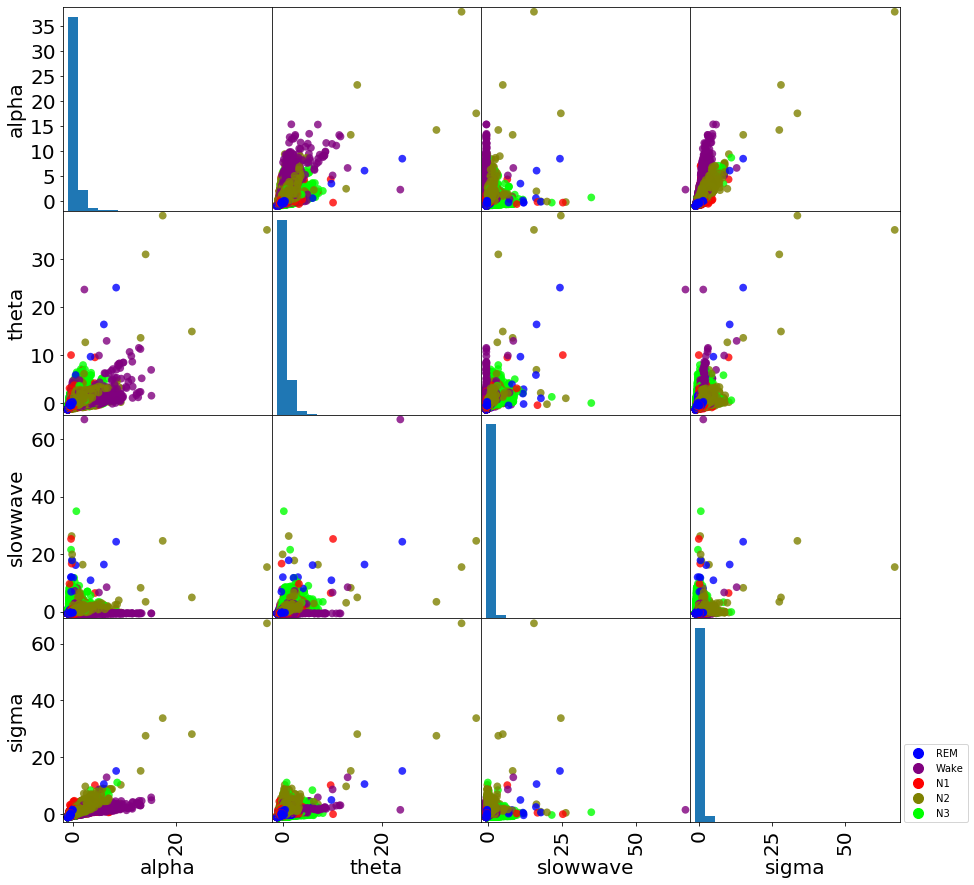

In [16]:
scatterplots = pd.plotting.scatter_matrix(df_preprocessed[con_ftrs],c = df_preprocessed['label'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = 'brg')
for ax in scatterplots.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.tick_params(labelsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)
handles = [plt.plot([],[],color=plt.cm.brg(i/4.), ls="", marker="o", \
                    markersize=10)[0] for i in range(5)]
labels=["REM", "Wake", "N1", "N2", "N3"]
plt.legend(handles, labels, loc=(1.02,0))
plt.savefig('../figures/scattermatrix.png',dpi=300)
plt.show()

In [14]:

# plt.show()

In [18]:
count_matrix = df.groupby(['NAP', 'label']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

label  -1.0   0.0   1.0   2.0   3.0
NAP                                
nap2   2053  3975  2069  6663  7911
nap3   2814  2229  2395  8997  6335
label      -1.0       0.0       1.0       2.0       3.0
NAP                                                    
nap2   0.090556  0.175334  0.091262  0.293900  0.348948
nap3   0.123584  0.097892  0.105182  0.395125  0.278217


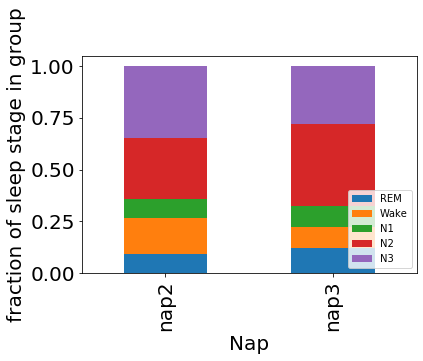

In [28]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of sleep stage in group', fontsize = 20)
plt.xlabel('Nap', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.legend(labels,loc=4)
plt.savefig('../figures/stacked_bar_stgpct1.png',dpi=300)
plt.show()

NameError: name 'labels' is not defined

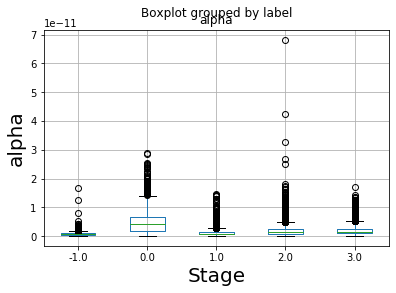

In [4]:
for i in range(len(con_ftrs)):
    df[[con_ftrs[i],'label']].boxplot(by='label')
    plt.ylabel(con_ftrs[i], fontsize = 20)
    plt.xlabel('Stage', fontsize = 20)
    plt.xticks([1, 2, 3, 4, 5], labels)
    plt.tick_params(labelsize = 20)
    fn = '../figures/boxplot' + con_ftrs[i]
    plt.savefig(fn,dpi=300)
    plt.show()

In [78]:
# feature engineering 
from sklearn.preprocessing import PolynomialFeatures

In [81]:
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
df_categorical = df_preprocessed.drop(con_ftrs, axis = 1, inplace=False)
poly_features = poly.fit_transform(df_preprocessed[con_ftrs])
print(poly_features.shape) # C42 + 4
poly_f = ['alpha', 'theta', 'slowwave', 'sigma','alphatheta', 'alphaslowwave','alphasigma','thetaslowwave', 'thetasigma','slowwavesigma']
df_poly = pd.DataFrame(poly_features, columns = poly_f)
df_preprocessed_poly = pd.concat([df_categorical, df_poly], axis = 1)
print(df_preprocessed_poly.shape)

(45441, 10)
(45441, 51)


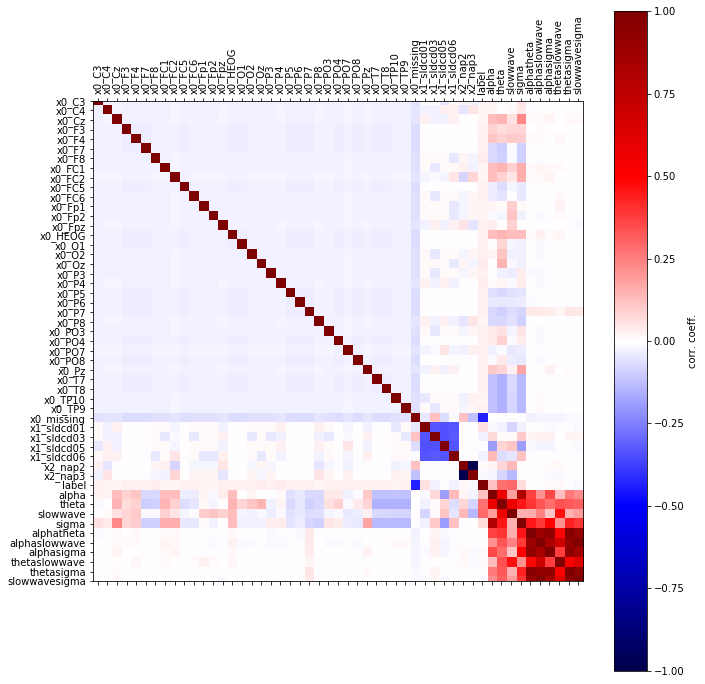

In [83]:
corr_matrix = df_preprocessed_poly.corr()
#print(df_preprocessed.columns)
plt.figure(figsize=(10,10))
plt.matshow(corr_matrix,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df_preprocessed_poly.corr().shape[0]),list(df_preprocessed_poly.corr().columns),rotation=90)
plt.yticks(np.arange(df_preprocessed_poly.corr().shape[0]),list(df_preprocessed_poly.corr().columns))
plt.tight_layout()
plt.savefig('../figures/corr_coeff_dummies_poly.png',dpi=300)
plt.show()

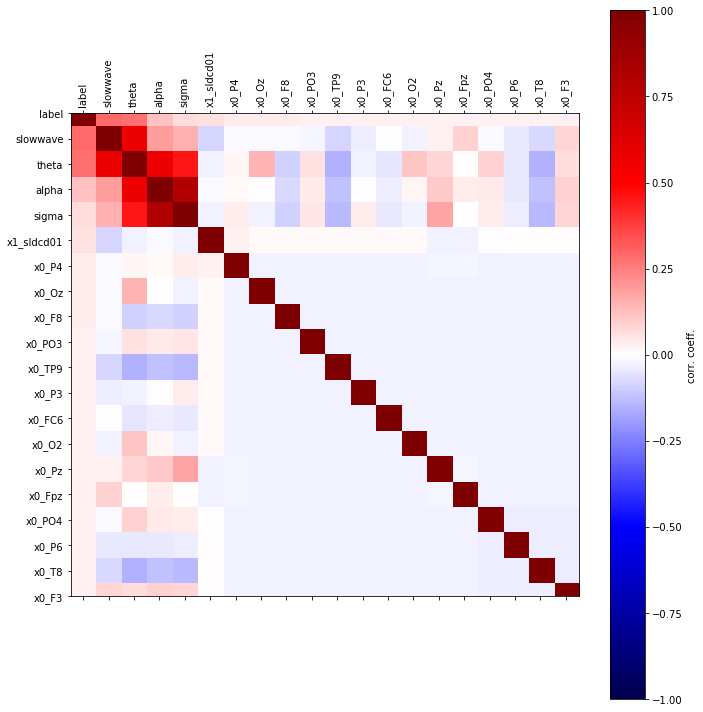

In [86]:
corrmat_2 = df_preprocessed_poly.corr()
#print(df_preprocessed.columns)
all_cols = corrmat_2.sort_values('label',ascending=False)['label'].index 
cols = all_cols[:20] # positively correlated features

cm = corrmat_2.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
plt.savefig('../figures/corbr_coeff_dummies_poscorr_poly.png',dpi=300)
plt.show()

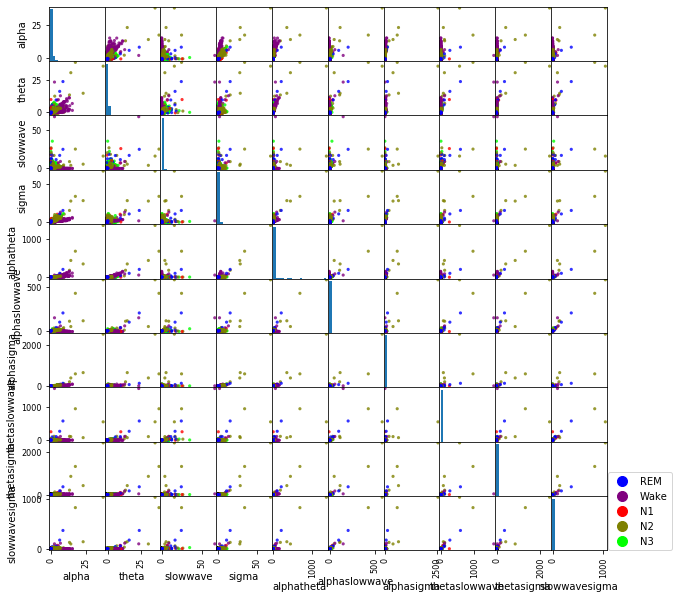

In [88]:
pd.plotting.scatter_matrix(df_preprocessed_poly[poly_f],c = df_preprocessed_poly['label'], figsize=(10, 10), marker='o',
                           hist_kwds={'bins': 20}, s=10, alpha=.8, cmap = 'brg')
handles = [plt.plot([],[],color=plt.cm.brg(i/4.), ls="", marker="o", \
                    markersize=10)[0] for i in range(5)]
labels=["REM", "Wake", "N1", "N2", "N3"]
plt.legend(handles, labels, loc=(1.02,0))
plt.savefig('../figures/scattermatrix_poly.png',dpi=300)
plt.show()

In [41]:
# calculate outlier portion 
from scipy import nanmean, nanstd
df_zscore = df_preprocessed[con_ftrs]
zscore = lambda x: (x - nanmean(x)) / nanstd(x)
df_zscore.apply(zscore)
outlier_portion = (df_zscore >= 3.0)
outlier_portion_1 = df_zscore <= -3.0
print(outlier_portion[con_ftrs[1]].value_counts(), outlier_portion_1[con_ftrs[1]].value_counts())
print(outlier_portion[con_ftrs[0]].value_counts(), outlier_portion_1[con_ftrs[0]].value_counts())
print(outlier_portion[con_ftrs[2]].value_counts(), outlier_portion_1[con_ftrs[2]].value_counts())
print(outlier_portion[con_ftrs[3]].value_counts(), outlier_portion_1[con_ftrs[3]].value_counts())

False    44795
True       646
Name: theta, dtype: int64 False    45441
Name: theta, dtype: int64
False    44706
True       735
Name: alpha, dtype: int64 False    45441
Name: alpha, dtype: int64
False    44747
True       694
Name: slowwave, dtype: int64 False    45441
Name: slowwave, dtype: int64
False    44730
True       711
Name: sigma, dtype: int64 False    45441
Name: sigma, dtype: int64


In [42]:
df[outlier_portion]

,Unnamed: 0,alpha,theta,slowwave,sigma,channel_name,label,subject,NAP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_preprocessed[outlier_portion]

,x0_C3,x0_C4,x0_Cz,x0_F3,x0_F4,x0_F7,x0_F8,x0_FC1,x0_FC2,x0_FC5,...,x1_sldcd03,x1_sldcd05,x1_sldcd06,x2_nap2,x2_nap3,alpha,theta,slowwave,sigma,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
